In [9]:
11.8620/1.495978e8

7.929260991806029e-8

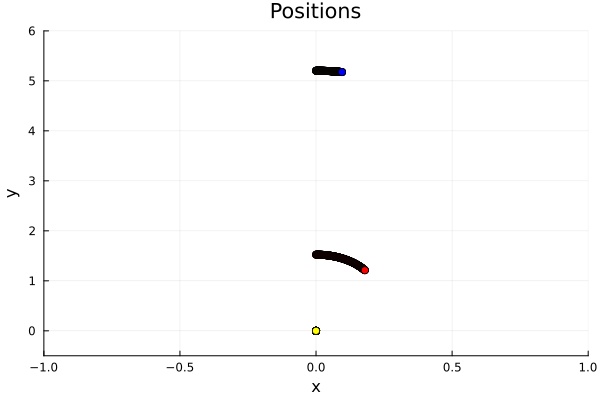

[0.09543257920642477, 5.175807044811581, -3.0426502869526815e-5]


┌ Info: Saved animation to /Users/shim/Desktop/Code/dev/Asteroid/Julia/animation.gif
└ @ Plots /Users/shim/.julia/packages/Plots/ju9dp/src/animation.jl:156


Plots.AnimatedGif("/Users/shim/Desktop/Code/dev/Asteroid/Julia/animation.gif")
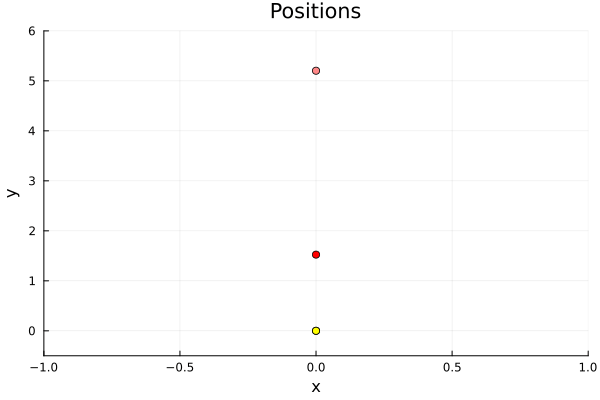

In [48]:
using LinearAlgebra
using Statistics
using Plots
using FFMPEG

gr()

function getAcc(pos, mass , G)
    x = pos[:,1,1]
    y = pos[:,2,1]
    z = pos[:,3,1]

    #天体間の距離
    dx = x' .- x
    dy = y' .- y
    dz = z' .- z

    #距離の3乗の逆数
    inv_r3 = (dx.^2 .+ dy.^2 .+ dz.^2 .+ 0.1).^(-1.5)

    #加速度
    ax = G * (dx .* inv_r3) * mass
    ay = G * (dy .* inv_r3) * mass
    az = G * (dz .* inv_r3) * mass

    #連結
    return hcat(ax,ay,az)
end

function getEnergy(pos, vel, mass, G)
    #運動エネルギーの総和
    KE = 0.5 * sum(sum(mass .* vel^2))

    x = pos[:,1,1]
    y = pos[:,2,1]
    z = pos[:,3,1]
    dx = x' .- x
    dy = y' .- y
    dz = z' .- z 
    
    inv_r = (dx.^2 .+ dy.^2 .+ dz.^2) .^ (0.5)
    inv_r[inv_r .> 0] = 1.0 ./ inv_r[inv_r .> 0]
    PE = G * sum(sum(triu(-(mass * mass')*inv_r,1)))

    return KE, PE

end

function main()
    t = 0.0
    tEnd = 1209600.0
    dt = 3600.0
    G = 1.0e-12
    mass = [
        1.0
        3.2272e-7
        9.5479e-4
    ]
    pos = [
        0.0 0.0 0.0
        0.0 1.5237 0.0
        0.0 5.2026 0.0
    ]
    vel = [
        0.0 0.0 0.0
        1.6096e-7 0.0 0.0
        7.9293e-8 0.0 0.0
    ]
    vel .-= mean(mass .* vel) / mean(mass)
    
    acc = getAcc(pos, mass, G)

    KE,PE = getEnergy(pos, vel, mass, G)

    Nt = Int(ceil(tEnd/dt))

    pos_save = zeros((3,3,Nt+1))
	pos_save[:,:,1] = pos
	KE_save = zeros(Nt+1)
	KE_save[1] = KE
	PE_save = zeros(Nt+1)
	PE_save[1] = PE

    for i in 1:Nt
		vel += acc * dt/2.0
		pos += vel * dt
		acc = getAcc( pos, mass, G)
		vel += acc * dt/2.0
		t += dt

        KE, PE  = getEnergy( pos, vel, mass, G )
        pos_save[:,:,i+1] = pos
		KE_save[i+1] = KE
		PE_save[i+1] = PE
    end
    
    p = scatter([0], [0], xlims=(-1,1), ylims=(-0.5,6), title="Positions", xlabel="x", ylabel="y", legend=false)
    anim = @animate for frame in 1:Nt
        for i in 1:3
            x = pos_save[i,1,frame]
            y = pos_save[i,2,frame]
            scatter!(p, [x], [y], color=colors[i])
        end
    end
    
    scatter!(p, [pos_save[3,1,Nt]], [pos_save[3,2,Nt]], color=:blue)
    println(pos_save[3,:,Nt])
    display(p)
    gif(anim, "animation.gif", fps=3600)
end

colors = [:yellow, :red, :"#ff8888"]

main()


## ↑割と望ましい結果
しかし正しい値ではない

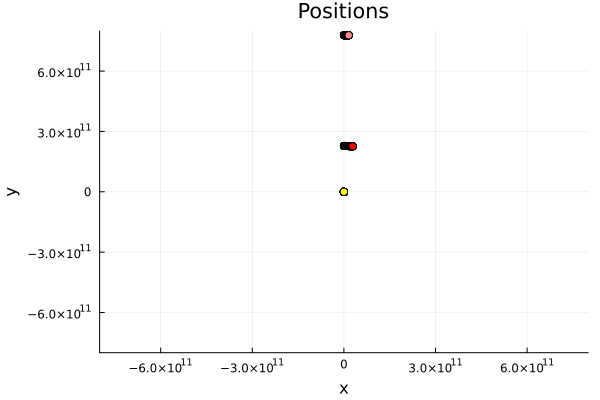

[1.5744274782630224e10, 7.781357101890465e11, -5.0107771030180855e6]


┌ Info: Saved animation to /Users/shim/Desktop/Code/dev/Asteroid/Julia/animation.gif
└ @ Plots /Users/shim/.julia/packages/Plots/ju9dp/src/animation.jl:156


Plots.AnimatedGif("/Users/shim/Desktop/Code/dev/Asteroid/Julia/animation.gif")
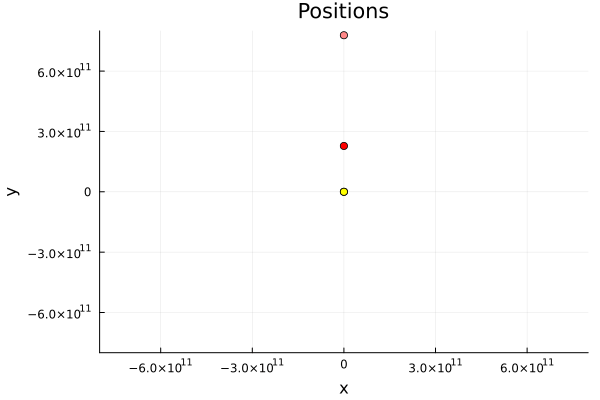

In [49]:
using LinearAlgebra
using Statistics
using Plots
using FFMPEG

gr()

function getAcc(pos, mass , G)
    x = pos[:,1,1]
    y = pos[:,2,1]
    z = pos[:,3,1]

    #天体間の距離
    dx = x' .- x
    dy = y' .- y
    dz = z' .- z

    #距離の3乗の逆数
    inv_r3 = (dx.^2 .+ dy.^2 .+ dz.^2 .+ 0.1).^(-1.5)

    #加速度
    ax = G * (dx .* inv_r3) * mass
    ay = G * (dy .* inv_r3) * mass
    az = G * (dz .* inv_r3) * mass

    #連結
    return hcat(ax,ay,az)
end

function getEnergy(pos, vel, mass, G)
    #運動エネルギーの総和
    KE = 0.5 * sum(sum(mass .* vel^2))

    x = pos[:,1,1]
    y = pos[:,2,1]
    z = pos[:,3,1]
    dx = x' .- x
    dy = y' .- y
    dz = z' .- z 
    
    inv_r = (dx.^2 .+ dy.^2 .+ dz.^2) .^ (0.5)
    inv_r[inv_r .> 0] = 1.0 ./ inv_r[inv_r .> 0]
    PE = G * sum(sum(triu(-(mass * mass')*inv_r,1)))

    return KE, PE

end

function main()
    t = 0.0
    tEnd = 1209600.0
    dt = 3600.0
    G = 6.674e-11
    mass = [
        1.988e30
        6.416e23
        1.898e27
    ]
    pos = [
        0.0 0.0 0.0
        0.0 2.279e11 0.0
        0.0 7.783e11 0.0
    ]
    vel = [
        0.0 0.0 0.0
        24.08e3 0.0 0.0
        13.06e3 0.0 0.0
    ]
    vel .-= mean(mass .* vel) / mean(mass)
    
    acc = getAcc(pos, mass, G)

    KE,PE = getEnergy(pos, vel, mass, G)

    Nt = Int(ceil(tEnd/dt))

    pos_save = zeros((3,3,Nt+1))
	pos_save[:,:,1] = pos
	KE_save = zeros(Nt+1)
	KE_save[1] = KE
	PE_save = zeros(Nt+1)
	PE_save[1] = PE

    for i in 1:Nt
		vel += acc * dt/2.0
		pos += vel * dt
		acc = getAcc( pos, mass, G)
		vel += acc * dt/2.0
		t += dt

        KE, PE  = getEnergy( pos, vel, mass, G )
        pos_save[:,:,i+1] = pos
		KE_save[i+1] = KE
		PE_save[i+1] = PE
    end
    
    p = scatter([0], [0], xlims=(-8.0e11,8.0e11), ylims=(-8.0e11,8.0e11), title="Positions", xlabel="x", ylabel="y", legend=false)
    anim = @animate for frame in 1:Nt
        for i in 1:3
            x = pos_save[i,1,frame]
            y = pos_save[i,2,frame]
            scatter!(p, [x], [y], color=colors[i])
        end
    end
    
    println(pos_save[3,:,Nt])
    display(p)
    gif(anim, "animation.gif", fps=3600)
end

colors = [:yellow, :red, :"#ff8888"]

main()


In [51]:
60*60*24*365*100

3153600000

In [ ]:
3,153,600,000